In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Weighted median

In the video we have discussed that for MAPE metric the best constant prediction is [weighted median](https://en.wikipedia.org/wiki/Weighted_median) with weights

$$w_i = \frac{\sum_{j=1}^N \frac{1}{x_j}}{x_i}$$

for each object $x_i$.

This notebook exlpains how to compute weighted median. Let's generate some data first, and then find it's weighted median.

In [36]:
N = 5
x = np.random.randint(low=1, high=100, size=N)
x

array([10,  2, 19, 57, 83])

1) Compute *normalized* weights:

In [37]:
inv_x = 1.0/x
inv_x

array([0.1       , 0.5       , 0.05263158, 0.01754386, 0.01204819])

In [38]:
a=inv_x[0]+inv_x[1]+inv_x[2]+inv_x[3]+inv_x[4]
inv_x[0]/a

0.14657950179700086

In [39]:
w = inv_x/sum(inv_x)
w

array([0.1465795 , 0.73289751, 0.07714711, 0.0257157 , 0.01766018])

2) Now sort the normalized weights. We will use `argsort` (and not just `sort`) since we will need indices later.

In [40]:
idxs = np.argsort(w)
sorted_w = w[idxs]
sorted_w

array([0.01766018, 0.0257157 , 0.07714711, 0.1465795 , 0.73289751])

3) Compute [cumulitive sum](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.cumsum.html) of sorted weights

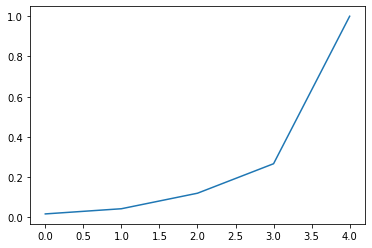

sorted_w_cumsum:  [0.01766018 0.04337588 0.12052299 0.26710249 1.        ]


In [41]:
sorted_w_cumsum = np.cumsum(sorted_w)
plt.plot(sorted_w_cumsum); plt.show()
print ('sorted_w_cumsum: ', sorted_w_cumsum)

4) Now find the index when cumsum hits 0.5:

In [42]:
idx = np.where(sorted_w_cumsum>0.5)[0][0]
idx

4

5) Finally, your answer is sample at that position:

In [43]:
pos = idxs[idx]
x[pos]

2

In [44]:
print('Data: ', x)
print('Sorted data: ', np.sort(x))
print('Weighted median: %d, Median: %d' %(x[pos], np.median(x)))

Data:  [10  2 19 57 83]
Sorted data:  [ 2 10 19 57 83]
Weighted median: 2, Median: 19


Thats it! 

If the procedure looks surprising for you, try to do steps 2--5 assuming the weights are $w_i=\frac{1}{N}$. That way you will find a simple median (not weighted) of the data. 